In [1]:
#Gridsearchcv to fine-tune a Decision Tree Classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV




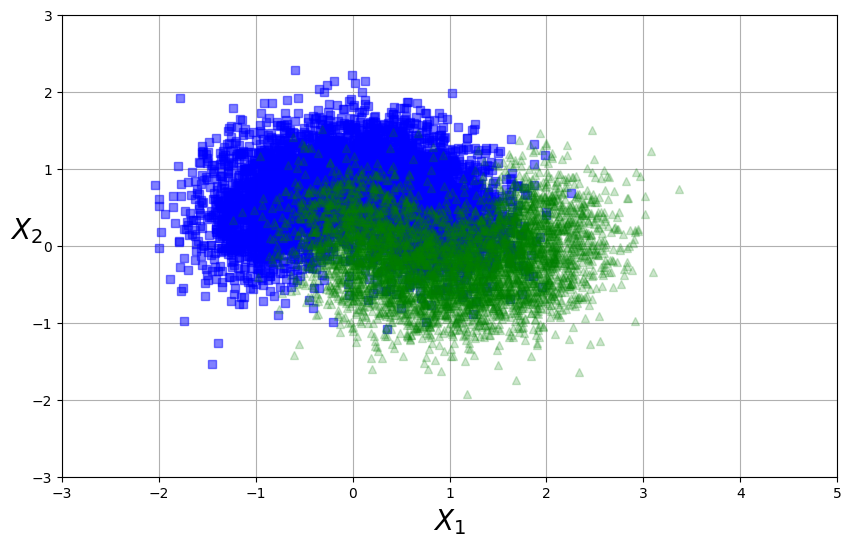

In [2]:
def plot_dataset(X, y, axes):
  plt.figure(figsize=(10,6))
  plt.plot(X[:, 0][y==0], X[:, 1][y==0],"bs",alpha = 0.5)
  plt.plot(X[:, 0][y==1], X[:, 1][y==1],'g^',alpha = 0.2)
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$X_1$", fontsize=20)
  plt.ylabel(r"$X_2$", fontsize=20, rotation=0)

X, y = make_moons(n_samples=10000, noise=0.4, random_state=21)
plot_dataset(X, y, [-3, 5, -3, 3])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tree_clf= DecisionTreeClassifier()

parameter={'criterion': ["gini", "entropy"],
            'max_leaf_nodes': list(range(2,50)),
            'min_samples_split': [2,3,4]
            }
clf=GridSearchCV(tree_clf, parameter, cv = 5,scoring="accuracy", return_train_score=True, n_jobs=-1)
clf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [5]:
clf.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 24, 'min_samples_split': 2}

In [6]:
cvres = clf.cv_results_

for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
  print(mean_score, params)


0.77596875 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.77596875 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.77596875 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.8186250000000002 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.8186250000000002 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3}
0.8186250000000002 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4}
0.8590312499999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8590312499999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.8590312499999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.8590312499999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.8590312499999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 3}
0.8590312499999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_spl

In [7]:
clf.score(X_train, y_train)

0.865125

In [8]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_train)
confusion_matrix(y_train,pred)

array([[3554,  457],
       [ 622, 3367]])

In [9]:
#from the confusion matrix let's get our precision and recall, which are better metrics.
from sklearn.metrics import precision_score, recall_score
pre = precision_score(y_train, pred)
re = recall_score(y_train, pred)
print(f"Precision:{pre} Recall:{re}")

Precision:0.8804916317991632 Recall:0.8440711957884182


In [10]:
#we have a higher precision than recall but lets combine the two metrics into F1 score
from sklearn.metrics import f1_score
f1_score(y_train, pred)


In [11]:
clf.score(X_test, y_test)

0.8615